# Load data and import ibraries

In [1]:
#Load libraries
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import pickle as pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error

In [ ]:
# Load credit risk data
file = arff.loadarff('dataset_31_credit-g.arff')
# file
file[1]

AttributeError: 'tuple' object has no attribute 'shape'

In [9]:
df = pd.DataFrame(file[0]) # Read credit risk data to a dataframe
df_fig = df.copy()
target = df.iloc[:,-1] # Slice the last column as target
# df
df.drop('class', axis=1, inplace=True) # Remove the last column (class) from the dataframe df
target

0      b'good'
1       b'bad'
2      b'good'
3      b'good'
4       b'bad'
        ...   
995    b'good'
996    b'good'
997    b'good'
998     b'bad'
999    b'good'
Name: class, Length: 1000, dtype: object

# Preprocessing

In [4]:
 # Find unique values in 'checking_status'
# df.iloc[:,0].unique()

In [5]:
# Encode the 'checking_status' column by mapping its values onto 0, 1, 2, and 3
# df['checking_status'].map({b'<0': 0, b'no checking': 1, b'0<=X<200': 2, b'>=200': 3})

In [56]:
# Hotencode all object attributes
# df[df.columns[df.dtypes==object]]
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df.select_dtypes('object'))
df_encoded.shape

(1000, 54)

In [43]:
type(df)

pandas.core.frame.DataFrame

In [57]:
# Scale all numerical attributes
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(exclude=object))
df_scaled

array([[-1.23647786, -0.74513141,  0.91847717, ...,  2.76645648,
         1.02707891, -0.42828957],
       [ 2.24819436,  0.94981679, -0.87018333, ..., -1.19140394,
        -0.704926  , -0.42828957],
       [-0.73866754, -0.41656241, -0.87018333, ...,  1.18331231,
        -0.704926  ,  2.33486893],
       ...,
       [-0.73866754, -0.87450324,  0.91847717, ...,  0.21583532,
        -0.704926  , -0.42828957],
       [ 1.9992892 , -0.50552769,  0.91847717, ..., -1.10345149,
        -0.704926  , -0.42828957],
       [ 1.9992892 ,  0.46245715,  0.02414692, ..., -0.75164167,
        -0.704926  , -0.42828957]], shape=(1000, 7))

In [58]:
# Concatenate object and nemerical attributes and create df_refined dataframe
df_refined = np.concatenate([df_encoded.todense(), df_scaled], axis=1) # todense method is used to convert from sparse to dense. It is done to avoid an error.
df_refined

matrix([[ 0.        ,  1.        ,  0.        , ...,  2.76645648,
          1.02707891, -0.42828957],
        [ 1.        ,  0.        ,  0.        , ..., -1.19140394,
         -0.704926  , -0.42828957],
        [ 0.        ,  0.        ,  0.        , ...,  1.18331231,
         -0.704926  ,  2.33486893],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.21583532,
         -0.704926  , -0.42828957],
        [ 0.        ,  1.        ,  0.        , ..., -1.10345149,
         -0.704926  , -0.42828957],
        [ 1.        ,  0.        ,  0.        , ..., -0.75164167,
         -0.704926  , -0.42828957]], shape=(1000, 61))

<Figure size 1000x1000 with 0 Axes>

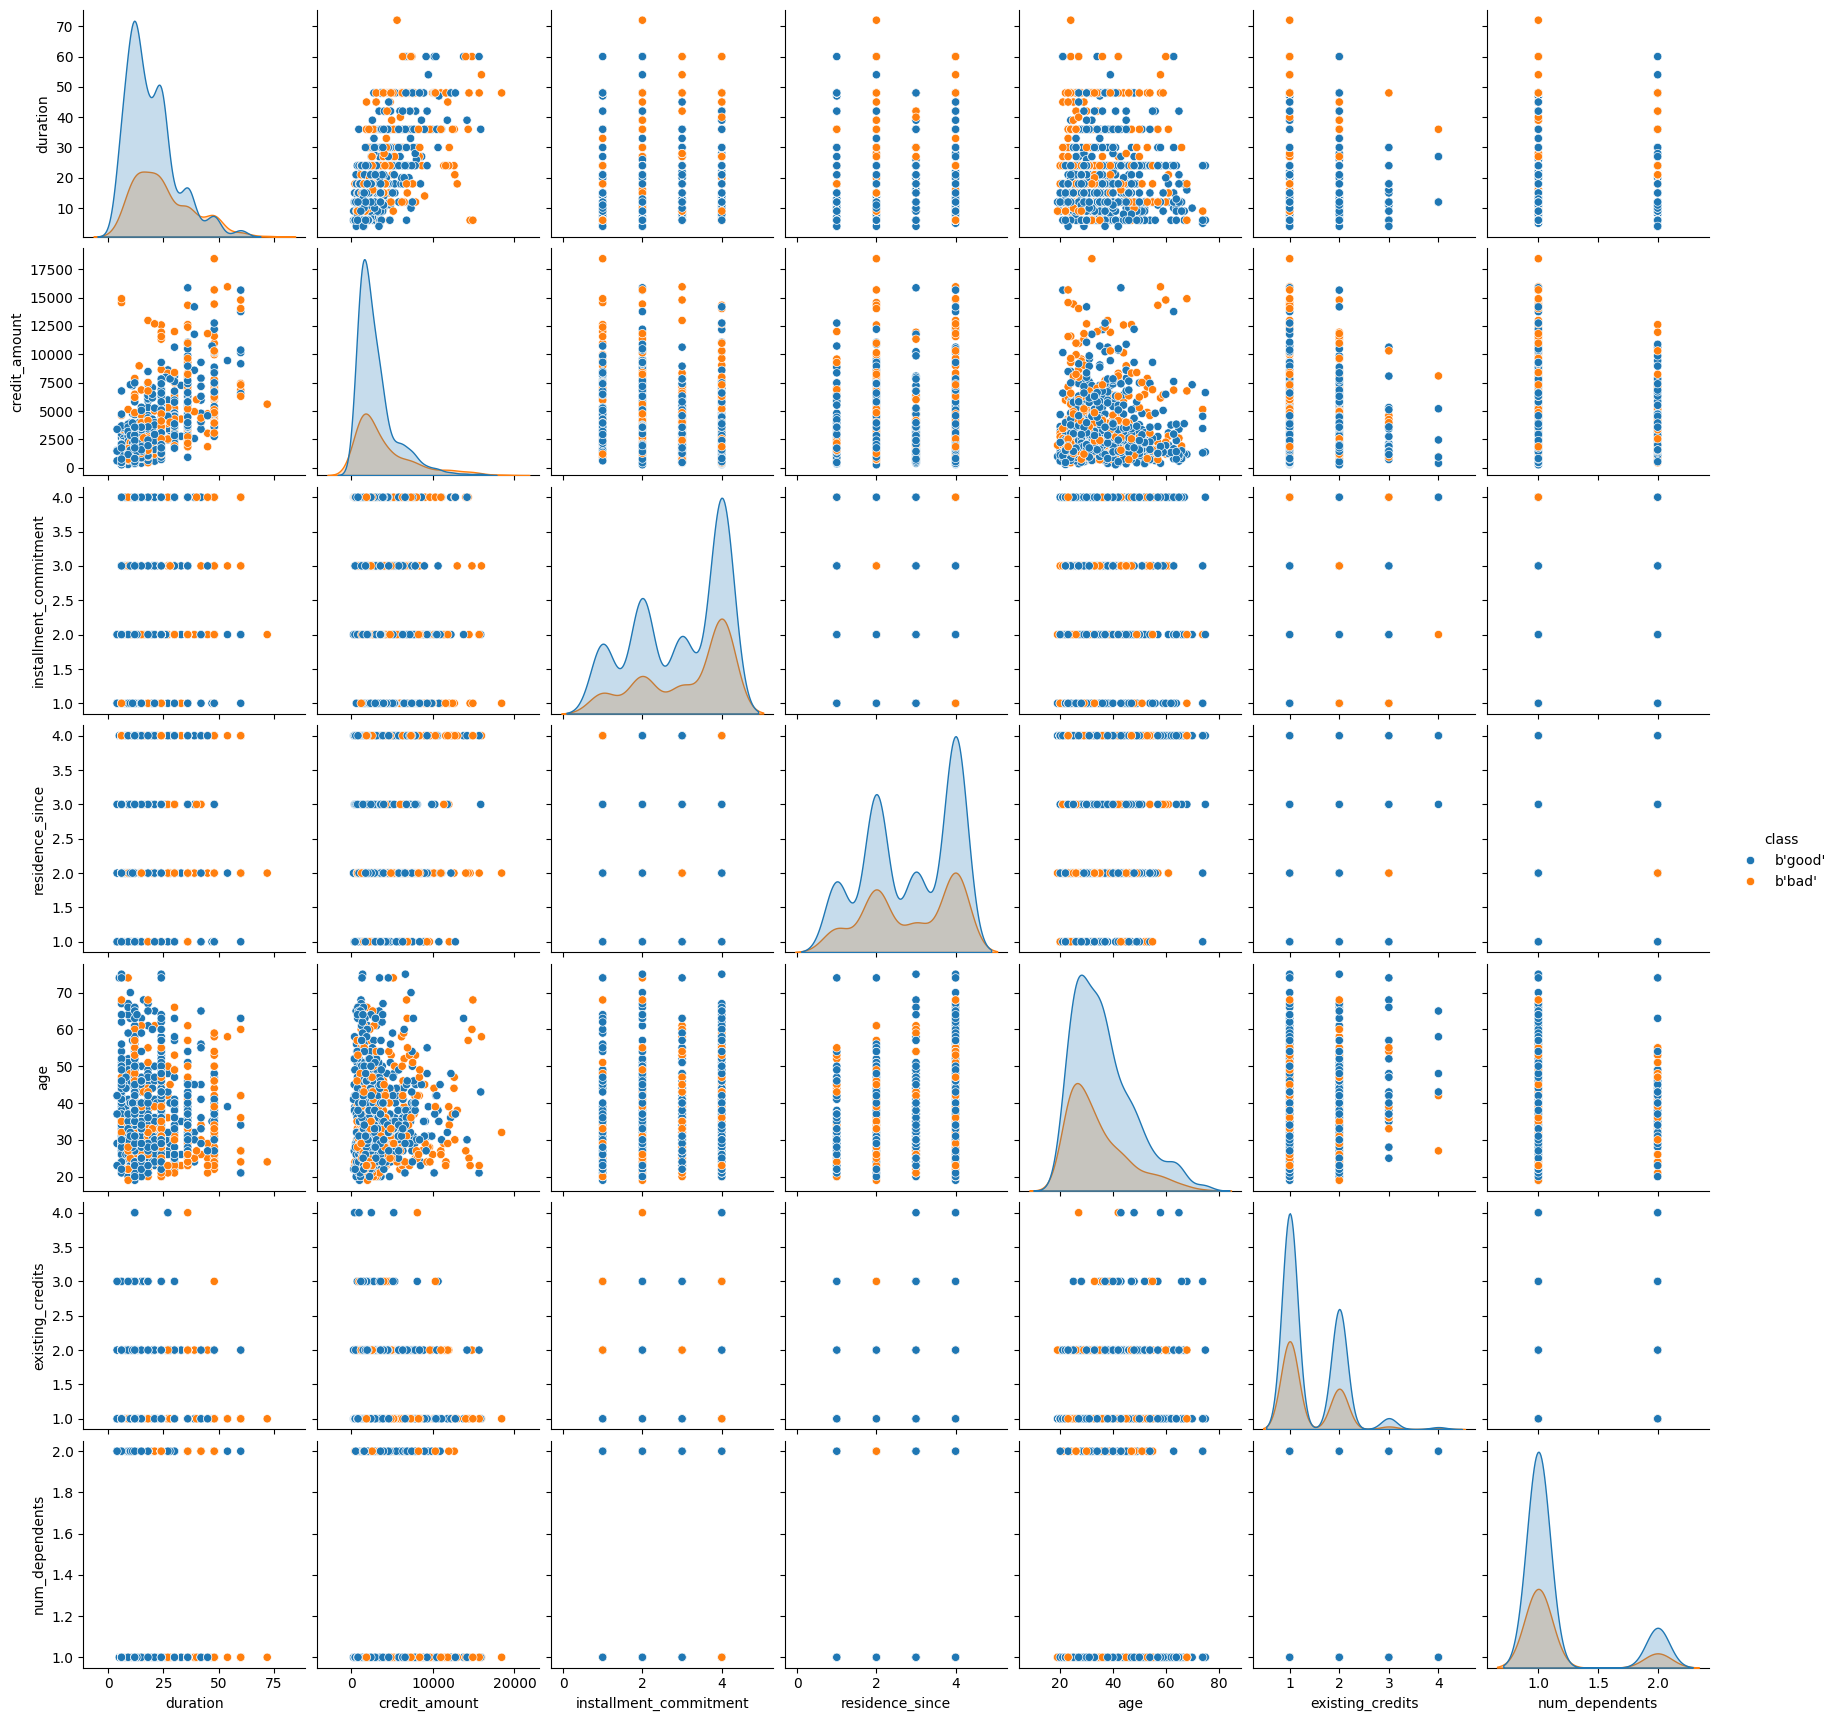

In [47]:
# Visualization
plt.figure(figsize=(10,10))
pair = sns.pairplot(df_fig,kind='scatter', hue='class')
# df_fig


In [ ]:
#type(df_refined)
df_refined = np.array(df_refined) # convert to numpy array to be used in "cross_val_score"
# type(df_refined)
df_refined

array([[ 0.        ,  1.        ,  0.        , ...,  2.76645648,
         1.02707891, -0.42828957],
       [ 1.        ,  0.        ,  0.        , ..., -1.19140394,
        -0.704926  , -0.42828957],
       [ 0.        ,  0.        ,  0.        , ...,  1.18331231,
        -0.704926  ,  2.33486893],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.21583532,
        -0.704926  , -0.42828957],
       [ 0.        ,  1.        ,  0.        , ..., -1.10345149,
        -0.704926  , -0.42828957],
       [ 1.        ,  0.        ,  0.        , ..., -0.75164167,
        -0.704926  , -0.42828957]], shape=(1000, 61))

# Apply multiple machine learning models

In [61]:
# Encode target by mapping to 1 and 0
target_encode = target.map({b'good': 1, b'bad': 0})
target_encode

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 1000, dtype: int64

In [62]:
accuracies = []
models = [
    LogisticRegression(),
    KNeighborsClassifier(8),
    SVC(C=100, kernel='rbf', gamma=0.001),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0)
]

skfold = StratifiedKFold(shuffle=True, random_state=0)


for clf in models:
    score=cross_val_score(clf, df_refined, target_encode, cv=skfold)
    accuracies.append(round(score.mean(), 3))

In [63]:
accuracies = np.array(accuracies).reshape(1,5)
df = pd.DataFrame(accuracies,columns=[clf.__class__.__name__ for clf in models])
df

,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier
0,0.75,0.736,0.75,0.674,0.758


<Axes: >

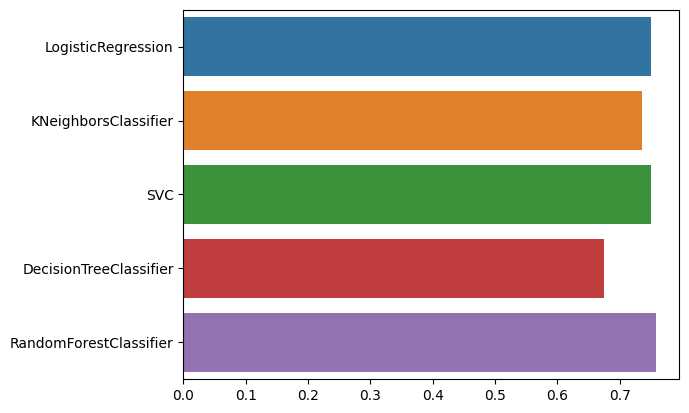

In [64]:
sns.barplot(df, orient='h')